In this note we use Binomial data to demonstrate Bayes inference and empirical Bayes (plus hierarchical Bayes) inference.

Example: what's the probability of a coin coss being head? Call this probability $\theta$, the goal is to use Bayesian inference to estimate $\theta$.

Assume that we have a prior belief of the distribution of $\theta$
    
$
P(\theta | \eta) = \text{Beta}(\theta|\alpha, \beta), \hspace{10pt} \text{where} \hspace{2pt} \eta \hspace{2pt} \text{stands for the hyper-parameter}.
$

and we observe coin tosses of x heads from n trials, the likelihood is

$
X | n, \theta  \sim \text{Binom} (x|n, \theta) = {n \choose x} \theta^{x} (1 - \theta)^{n-x} \\
$

- Hence, the posterior can be written as 

$
P(\theta | X, \alpha) = \text{Beta}(x+\alpha, n-x+\beta)
$

- The posterior mean and variance can be written as:

$
\begin{eqnarray}
\mathbb{E}[\theta|X, \alpha] &=& \dfrac{x+\alpha}{(x+\alpha) +(n-x+\beta)} = \dfrac{x+\alpha}{n+\alpha+\beta} \\
&& \\
\mathbb{Var}[\theta|X, \alpha] &=& \dfrac{(x+\alpha)(n-x+\beta)}{(x+\alpha+n-x+\beta)^2(x+\alpha+n-x+\beta+1)} = \dfrac{(x+\alpha)(n-x+\beta)}{(n+\alpha+\beta)^2(n+\alpha+\beta+1)} 
\end{eqnarray}
$


- Also, the marginal likelihood
$
P(D | \eta) = \dfrac{P(D, \eta)}{P(\eta)} = \dfrac{\int P(D, \eta, \theta) d\theta}{P(\eta)} = \dfrac{\int P(\eta) P(\theta | \eta) P(D | \theta, \eta) d\theta}{P(\eta)} = \int P(D | \theta) P(\theta | \eta)  d\theta
$


$\begin{eqnarray}
P(D | \eta) & =& \int P(D | \theta) P(\theta | \eta)  d\theta \\
 &=& \int_{0}^{1} \text{Binomial}(x|n,\theta) \hspace{3pt} \text{Beta}(\theta | \eta)  d\theta \\
 &=& \int_{0}^{1} \bigg[ {n \choose x} \theta^x (1-\theta)^{n-x} \bigg] \times  \bigg[ \dfrac{1}{B(\alpha, \beta)} \theta^{\alpha-1} (1-\theta)^{\beta-1}  \bigg] d\theta \\
 &=& \dfrac{1}{B(\alpha, \beta)} {n \choose x} \int_{0}^{1} \theta^{x+\alpha-1} (1-\theta)^{n-x+\beta-1} d\theta \\
 &=& {n \choose x} \dfrac{ B(x+\alpha, n-x+\beta)}{B(\alpha, \beta)}
\end{eqnarray}
$


- In addition, using the equalities

$
\boxed{
\begin{eqnarray}
\mathbb{E}[X] = \mathbb{E}_\theta \big[\mathbb{E}_{X|\theta} [X|\theta] \big] \\
&& \\
\mathbb{Var}[X] = \mathbb{E} \big[ \mathbb{Var}[X | \theta] \big] + \mathbb{Var} \big[ \mathbb{E} [X | \theta] \big]
\end{eqnarray}
}
$

one can show that for the above example we consider:

$
\begin{eqnarray}
\mathbb{E}[X]= n \dfrac{\alpha}{\alpha + \beta} \\
\mathbb{Var}[X] = n \dfrac{\alpha \beta}{(\alpha+\beta)^2} \dfrac{n+\alpha+\beta}{\alpha+\beta+1}
\end{eqnarray}
$



1) Bayesian inference.

Asuming that we use a prior of $P(\theta) = \text{Beta}(2,2)$, i.e., $\eta=(2,2)$, and observe $n=50, x=35$, the posterior mean and variance are:

$
\begin{eqnarray}
\mathbb{E}[X] &=& \dfrac{35+2}{50+2+2} = 0.685 \\
\mathbb{Var}[X] &=& \dfrac{(35+2)(50-35+2)}{(50+2+2)^2(50+2+2+1)} = 0.00392 \\
\sqrt{\mathbb{Var}[X]} &=& 0.06262
\end{eqnarray}
$


2) Empirical Bayes

Empirical Bayeses uses data to infer the value of the hyper-parameter $\eta$.
Let's assume that we choose $\eta = (\alpha, \alpha)$ and observe two sets of outcomes for n=50, outcome1: x=35, outcome2 x=27

Based on the formula above, and the "method of moments" (equating the $\mathbb{Var}$ to sample variance), we get

$
\mathbb{Var}[X] = \dfrac{n(n+2\alpha)}{4(2\alpha+1)} = \frac{1}{n-1}\sum_{i=1}^{2} (x_i - \bar{x}) = 32
$

hence
$\hat{\alpha} = 15.2$

Plug the number into the posterior formula, we get

$
\begin{eqnarray}
\mathbb{E}[\theta | X_1, \hat{\alpha}] &=& \dfrac{x_1 + \hat{\alpha}}{n + 2 \hat{\alpha}} = \dfrac{35+15.2}{50+2\times 15.2} = 0.624 \\
&& \\
\mathbb{Var}[\theta | X_1, \hat{\alpha}] &=& \dfrac{(x_1 + \hat{\alpha})(n-x_1+\hat{\alpha})}{(n+2\hat{\alpha})^2(n+2\hat{\alpha}+1)} = \dfrac{(35+15.2)(17+15.2)}{(50+2\times 15.2)^2(50+2\times 15.2+1)} = 0.00307 \\
\sqrt{\mathbb{Var}[\theta | X_1, \hat{\alpha}]} &=& 0.0554
\end{eqnarray}
$

In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [31]:
alpha_hat = 15.2
alphas = [2, 8, 32, alpha_hat]

xs = np.linspace(0, 1, 1000)
beta_dists = []
for alpha in alphas:
    n = 50
    x = 37
    beta = scipy.stats.beta(a=x+alpha, b=n-x+alpha)
    beta_dists.append(beta.pdf(xs))


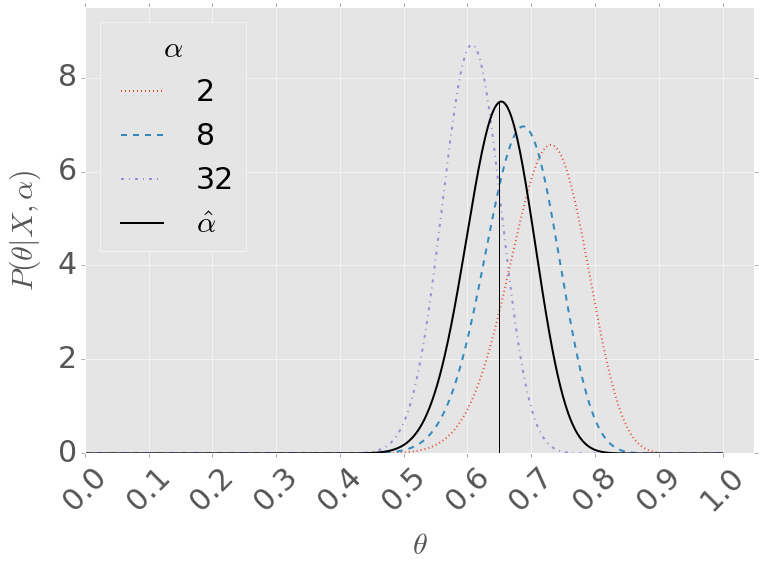

In [34]:
alpha_string = [str(alpha) for alpha in alphas]
alpha_string[-1] = r'$\hat{\alpha}$'

XMAX = 1.05
YMAX = 9.5
FONTSIZE = 30
plt.close('all')
fig, ax = plt.subplots(1, figsize=(12, 8))
plotted_objs = []

# Plot Bayes with different alpha value
line_styles = [':', '--', '-.']
for i, alpha in enumerate(alphas[0:3]):
    p, = ax.plot(xs, beta_dists[i], lw=2, linestyle=line_styles[i])
    plotted_objs.append(p)
p, = ax.plot(xs, beta_dists[3], lw=2, color='k') 
plotted_objs.append(p)

# Plot the vertical line indicating the posterior mean
posterior_mean = (x + alphas[-1])/(n+2 * alphas[-1])
beta = scipy.stats.beta(a=x+alphas[-1], b=n-x+alphas[-1])
mean_post, = ax.plot([posterior_mean, posterior_mean], [0, beta.pdf(posterior_mean)], color='k')

# Plot empirical Bayes
ax.set_xlabel(r'$\theta$', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel(r'$P(\theta|X, \alpha)$', fontsize=FONTSIZE, labelpad=15)
ax.set_xlim(0, XMAX)
ax.set_ylim(0, YMAX)
ax.set_xticks(np.arange(0, XMAX, 0.1))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_rotation(45)

l = plt.legend(plotted_objs, alpha_string, fontsize=FONTSIZE, loc=2, title=r'$\alpha$')
l.get_title().set_fontsize(FONTSIZE)